In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d tarkkaanko/amazon

401 - Unauthorized


In [ ]:
! unzip /content/amazon.zip

Archive:  /content/amazon.zip
  inflating: amazon_reviews.csv      


In [ ]:
data=pd.read_csv('/content/amazon_reviews.csv')
data.head(10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


In [ ]:
data.shape

(4915, 12)

In [ ]:
data=data[['reviewText','overall']]
data.head()

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In [ ]:
data.isnull().sum()

reviewText    1
overall       0
dtype: int64

In [ ]:
data=data.dropna()

Data Cleaning

In [ ]:
stopword = set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = " ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text

data['content'] = data['reviewText'].apply(clean)

In [ ]:
rating=data['overall']
rating

0       4.0
1       5.0
2       4.0
3       5.0
4       5.0
       ... 
4910    1.0
4911    5.0
4912    5.0
4913    5.0
4914    5.0
Name: overall, Length: 4914, dtype: float64

In [ ]:
rating=data["overall"].value_counts()
print(rating)
numbers=rating.index
print(numbers)
quantity=rating.values
print(quantity)

import plotly.express as px
figure=px.pie(data,
              values=quantity,
              names=numbers,hole=0.6)
figure.show()

5.0    3921
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64
Float64Index([5.0, 4.0, 1.0, 3.0, 2.0], dtype='float64')
[3921  527  244  142   80]


In [ ]:
data.content

0                                                 issues.
1       purchas device, work advertised. never much ph...
2       work expected. sprung higher capacity.  think ...
3       think work great.had diff. bran  card went sou...
4       bought retail packaging, arriv legit, orang en...
                              ...                        
4910    bought sandisk  class  use htc inspire,  month...
4911    use extend capabl samsung galaxi note .  great...
4912    great card fast reliable. come option adapt sd...
4913     good amount space stuff want do, fit gopro. say?
4914    i'v heard bad thing  micro sd card crap week s...
Name: content, Length: 4914, dtype: object

issues. purchas device, work advertised. never much phone memory, sinc download lot stuff brainer me. work expected. sprung higher capacity.  think made bit cheesier earlier versions; paint look clean think work great.had diff. bran  card went south  months.thi one held pretti well sinc , .*** updat //'ve month zero issu sinc transfer   . card reliabl solid!cheers! bought retail packaging, arriv legit, orang envelope, english version asian like pictur shows. arriv quickly, bought   retail packag htc one sv lg optimus, card work order, probabl best price get nice sd card mini storage.  anyth els suppos to.  purchas add addit storag microsoft surfac pro tablet come   gb.  suppos sandisk long stand reput speak itself. phone never skip beat. file transfer speedi corrupt issu memori fade issu would expect sandisk brand. great card own. entrust precious file slight cheaper piec crap? lose everyth forgiv spend extra coupl buck trust product goe good qa? hard believ afford digit become.  gb de

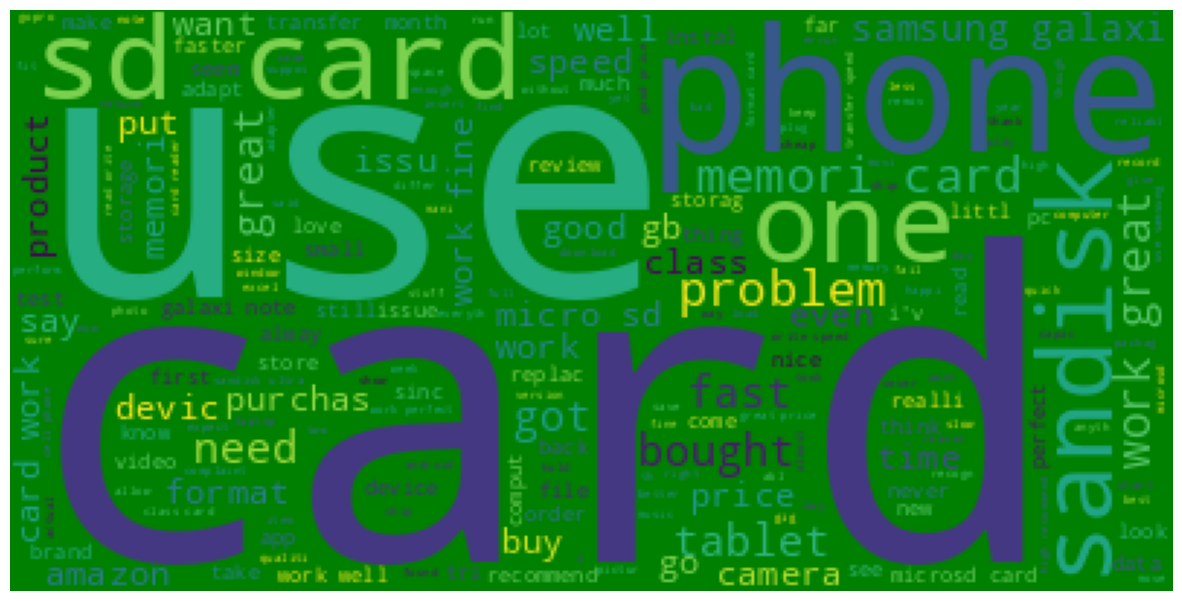

In [ ]:
text=" ".join(i for i in data.content)
print(text)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords, background_color="green").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='antialiased')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data=data[["content","Positive","Negative","Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,content,Positive,Negative,Neutral
0,issues.,0.000,0.0,1.000
1,"purchas device, work advertised. never much ph...",0.000,0.0,1.000
2,work expected. sprung higher capacity. think ...,0.172,0.0,0.828
3,think work great.had diff. bran card went sou...,0.101,0.0,0.899
4,"bought retail packaging, arriv legit, orang en...",0.241,0.0,0.759


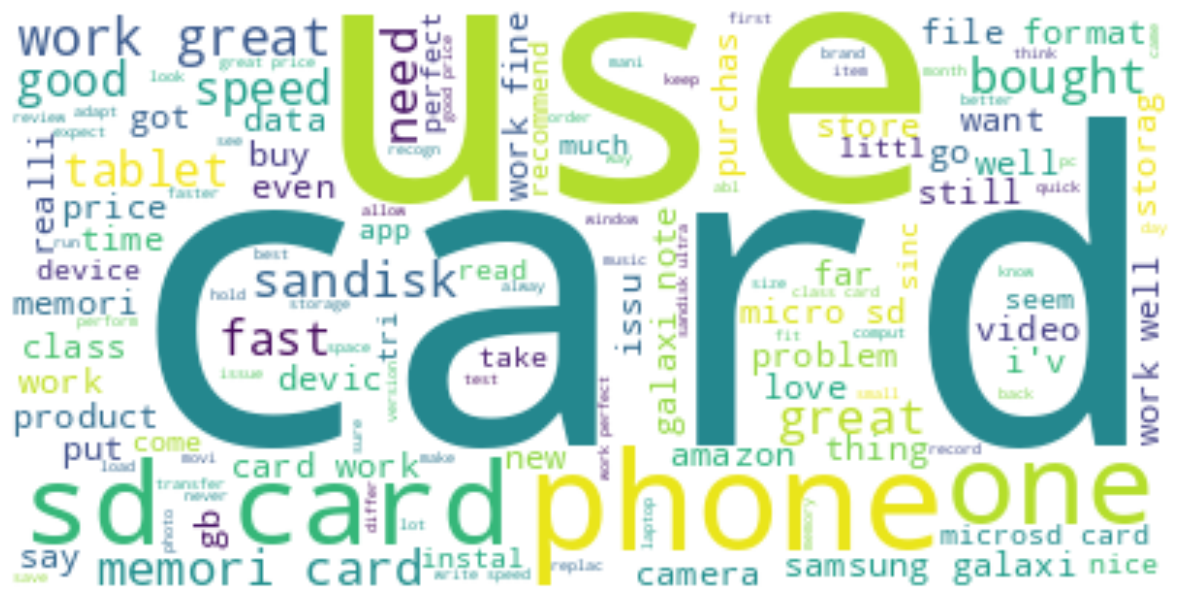

In [ ]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

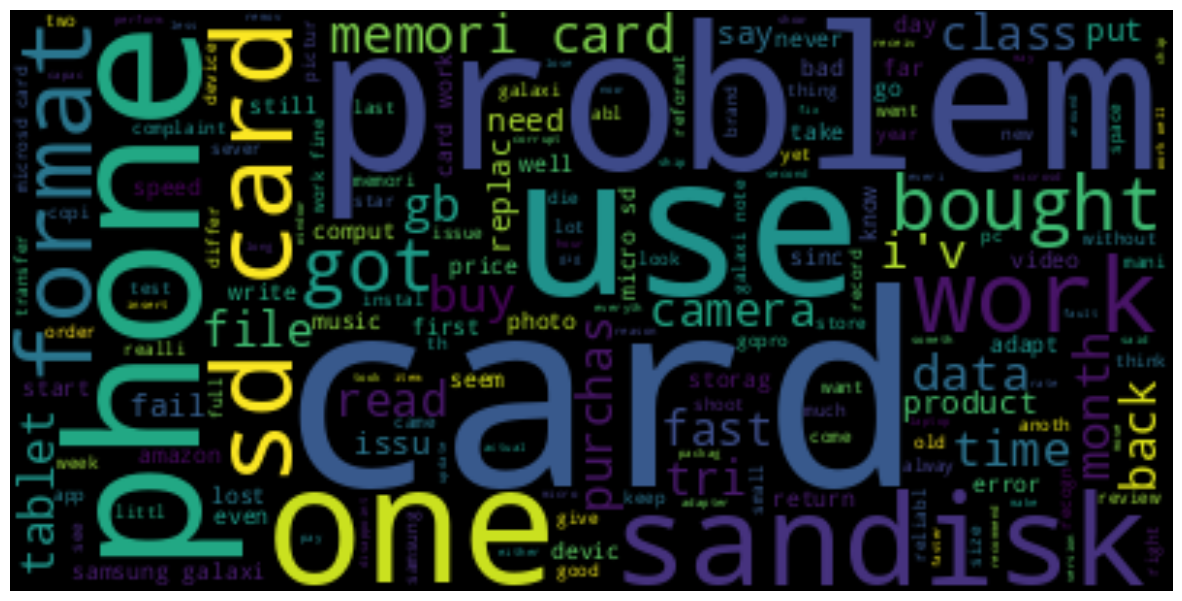

In [ ]:
negative = ' '.join([i for i in data['content'][data['Negative']>data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'black').generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()